In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

In [2]:
data = pd.read_csv("results.csv")

In [3]:
data.columns

Index(['25k', 'age', 'name', 'division', '10k', 'gender', 'half', 'official',
       'bib', 'ctz', 'country', 'overall', 'pace', 'state', '30k', '5k',
       'genderdiv', '20k', '35k', 'city', '40k'],
      dtype='object')

In [4]:
data = data.replace("-",np.nan)
for col in ['25k', 'age', '10k', 'half', 'official', 'overall'
          , 'pace','30k', '5k', 'genderdiv', '20k', '35k', '40k']:
    print(col)
    data[col] = pd.to_numeric(data[col])

25k
age
10k
half
official
overall
pace
30k
5k
genderdiv
20k
35k
40k


In [5]:
data.sample(10)

,25k,age,name,division,10k,gender,half,official,bib,ctz,...,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
15748,136.27,52,"Sullivan, Theresa",344,53.38,F,114.50,235.83,19724,NaN,...,15211,9.00,FL,165.42,26.42,5614,108.50,194.80,Panama City,223.20
14723,129.08,52,"McHugh, Mary P.",134,51.68,F,108.83,222.15,18062,NaN,...,11875,8.48,OH,155.57,25.83,3723,103.20,182.97,Worthington,209.70
15249,131.67,46,"Hicks, Debbie",540,54.18,F,111.15,228.60,18815,NaN,...,13493,8.73,OH,159.13,26.57,4613,105.50,187.58,Medina,215.83
6899,118.30,50,"Broussard, Ben",925,46.20,M,98.93,214.45,8364,NaN,...,9678,8.18,CA,144.75,23.28,7175,93.75,172.30,San Diego,201.67
13037,123.63,46,"Dominick, Kim",176,49.35,F,104.28,214.50,15922,NaN,...,9699,8.18,LA,149.05,24.77,2517,98.98,174.55,Baton Rouge,201.47
1579,103.83,50,"Brown, Denis J.",29,40.77,M,87.28,173.82,1959,NaN,...,1134,6.63,NaN,125.17,20.42,1071,82.73,145.98,Keilor,165.18
15178,132.70,45,"McGill, Michelle",420,53.73,F,112.27,224.65,18714,NaN,...,12544,8.58,TX,159.53,27.27,4097,106.50,186.43,The Woodlands,213.15
15015,142.97,53,"Tweeten, Lois",499,56.32,F,120.02,245.63,18478,NaN,...,16848,9.38,IL,172.10,28.20,6566,113.95,202.43,Cary,232.15
804,107.13,45,"Morawski, Mark",254,42.40,M,90.25,186.15,1006,NaN,...,3031,7.10,MI,129.35,21.00,2791,85.55,152.30,Birmingham,175.78
11137,129.30,51,"Uchiyama, Donald M",1445,51.78,M,108.83,238.48,13541,NaN,...,15785,9.10,WA,157.02,25.93,9867,103.27,193.12,Kirkland,224.70


# Let's look at the running time during the marathon...

In [8]:
running_time = data[["5k",'10k',"20k",'half','25k','30k','35k','40k','official']].stack().reset_index().rename(columns={0:"data"})



SyntaxError: invalid syntax (<ipython-input-8-3d9d85da1a42>, line 4)

# Running time during the Marathon

We can see the initially compact group of time at 5k and 10k slowly strech as the marathon goes the end.

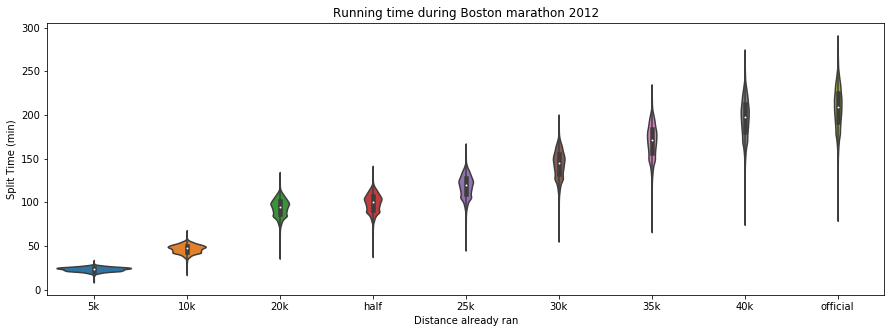

In [10]:
plt.figure(figsize=(15,5));
sns.violinplot(data=running_time, x="level_1",y="data")
plt.title("Running time during Boston marathon 2012")
plt.xlabel("Distance already ran");
plt.ylabel("Split Time (min)");

In [11]:
running_time_5k = data[["5k",'10k',"20k",'25k','30k','35k','40k']].stack().reset_index().rename(columns={0:"data"})



In [12]:
running_time_5k["distance"] = running_time_5k["level_1"].map({"5k":5000,"10k":10000,"20k":20000,"half":42195//2,
                                             "25k":25000,"30k":30000,"35k":35000,"40k":40000,"official":42195,})

In [13]:
running_time_5k[["prev_data","prev_distance","prev_level_0"]] = running_time_5k[["data","distance","level_0"]].shift()

In [14]:
running_time_5k.sample(5)

,level_0,level_1,data,distance,prev_data,prev_distance,prev_level_0
43736,6258,10k,44.68,10000,22.47,5000.0,6258.0
75700,10831,40k,228.87,40000,185.62,35000.0,10831.0
34094,4878,35k,151.12,35000,128.45,30000.0,4878.0
42631,6100,5k,23.08,5000,181.92,40000.0,6099.0
105725,15129,30k,147.25,30000,120.42,25000.0,15129.0


In [15]:
running_time_5k.loc[running_time_5k.level_0 != running_time_5k.prev_level_0, "prev_data"] = 0 
running_time_5k.loc[running_time_5k.level_0 != running_time_5k.prev_level_0, "prev_distance"] = 0 


In [16]:
running_time_5k[running_time_5k.level_0 != running_time_5k.prev_level_0]

,level_0,level_1,data,distance,prev_data,prev_distance,prev_level_0
0,0,5k,8.90,5000,0.0,0.0,NaN
7,1,5k,15.90,5000,0.0,0.0,0.0
14,2,5k,15.93,5000,0.0,0.0,1.0
21,3,5k,8.98,5000,0.0,0.0,2.0
28,4,5k,8.92,5000,0.0,0.0,3.0
35,5,5k,15.93,5000,0.0,0.0,4.0
42,6,5k,8.98,5000,0.0,0.0,5.0
49,7,5k,15.90,5000,0.0,0.0,6.0
56,8,5k,9.38,5000,0.0,0.0,7.0
63,9,5k,15.93,5000,0.0,0.0,8.0


In [17]:
running_time_5k["current_time"] = running_time_5k.data - running_time_5k.prev_data
running_time_5k["latest_avg_speed"] = 60/1000*(running_time_5k.distance - running_time_5k.prev_distance)/running_time_5k.current_time

In [19]:
running_time_5k.loc[running_time_5k.level_1=="20k","current_time"] = running_time_5k.current_time/2

# Time to run the last 5k before the milestone

Except for the "20k" milestone (we do not have the "15k" milestone), we can calculate the time the runner took to run the previous 5 km.

We can notice the regularity of most of the time, the milestone that see the highest time being the 30k miletone and 40k at the end of the race.



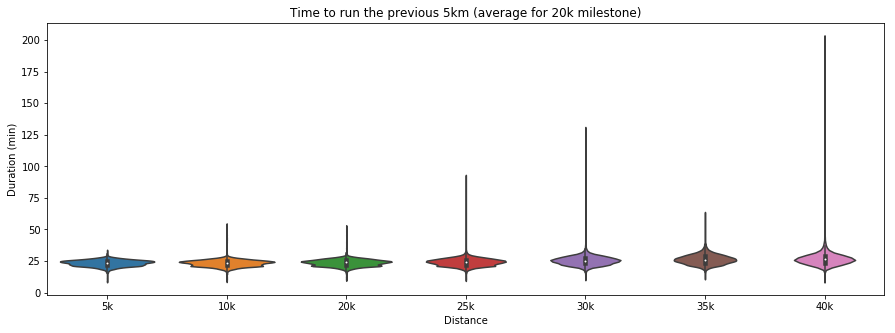

In [21]:
plt.figure(figsize=(15,5));
sns.violinplot(data=running_time_5k, x="level_1",y="current_time");
plt.title("Time to run the previous 5km (average for 20k milestone)");
plt.xlabel("Distance");
plt.ylabel("Duration (min)");


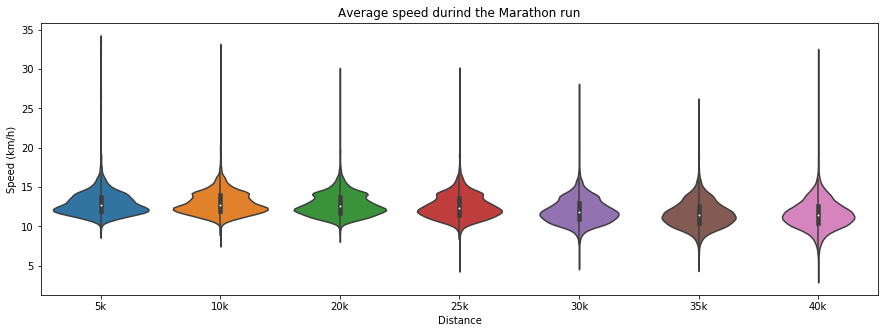

In [22]:
plt.figure(figsize=(15,5));
sns.violinplot(data=running_time_5k, x="level_1",y="latest_avg_speed")
plt.title("Average speed durind the Marathon run");
plt.xlabel("Distance");
plt.ylabel("Speed (km/h)");

In [74]:
running_time_5k[running_time_5k.latest_avg_speed>30]

,level_0,level_1,data,distance,prev_data,prev_distance,prev_level_0,current_time,latest_avg_speed
0,0,5k,8.90,5000,0.00,0.0,NaN,8.90,33.707865
1,0,10k,18.18,10000,8.90,5000.0,0.0,9.28,32.327586
21,3,5k,8.98,5000,0.00,0.0,2.0,8.98,33.407572
22,3,10k,18.73,10000,8.98,5000.0,3.0,9.75,30.769231
28,4,5k,8.92,5000,0.00,0.0,3.0,8.92,33.632287
29,4,10k,18.18,10000,8.92,5000.0,4.0,9.26,32.397408
42,6,5k,8.98,5000,0.00,0.0,5.0,8.98,33.407572
43,6,10k,18.73,10000,8.98,5000.0,6.0,9.75,30.769231
56,8,5k,9.38,5000,0.00,0.0,7.0,9.38,31.982942
77,11,5k,8.92,5000,0.00,0.0,10.0,8.92,33.632287


In [26]:
data["second_half_time"] = data.official- data.half


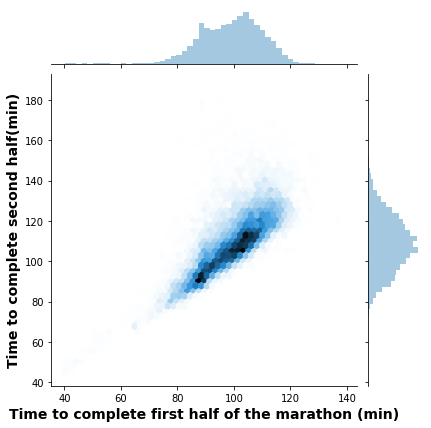

In [27]:
h = sns.jointplot(data.half,data.second_half_time, kind="hex")
h.set_axis_labels('x', 'y', fontsize=14)

# or set labels via the axes objects
h.ax_joint.set_xlabel('Time to complete first half of the marathon (min)', fontweight='bold');
h.ax_joint.set_ylabel('Time to complete second half(min)', fontweight='bold');


In [34]:
import pandas_profiling
pandas_profiling.ProfileReport(data[["half","second_half_time"]])

Number of variables,2
Number of observations,16164
Total Missing (%),0.1%
Total size in memory,252.6 KiB
Average record size in memory,16.0 B
Numeric,2
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [28]:
dat_for_cluster = data[["half","second_half_time"]].dropna()

In [63]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(dat_for_cluster, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(dat_for_cluster)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))



Number of estimated clusters: 2


Text(0.5, 1.0, 'Clustering Boston 2012 runners using MeanShift and estimate bandwidth in 2 groups.')

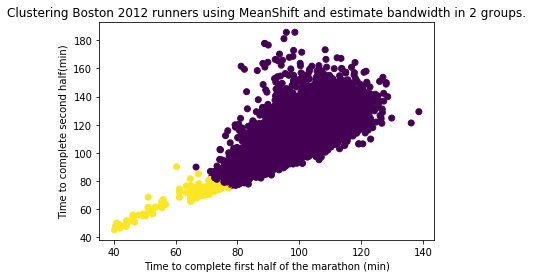

In [64]:
plt.scatter(dat_for_cluster.half, dat_for_cluster.second_half_time, c=labels)
plt.xlabel('Time to complete first half of the marathon (min)');
plt.ylabel('Time to complete second half(min)');
plt.title("Clustering Boston 2012 runners using MeanShift and estimate bandwidth in 2 groups.");

In [60]:
from sklearn.cluster import KMeans
# We know we're looking for three clusters.
n_clusters=7

# Declare and fit the model.
sc = KMeans(n_clusters=n_clusters)
sc.fit(dat_for_cluster)

#Predicted clusters.
predict=sc.fit_predict(dat_for_cluster)

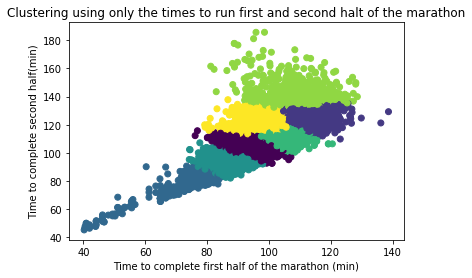

In [65]:
plt.scatter(dat_for_cluster.half, dat_for_cluster.second_half_time, c=predict)
plt.title("Clustering using only the times to run first and second halt of the marathon");
plt.xlabel('Time to complete first half of the marathon (min)');
plt.ylabel('Time to complete second half(min)');

In [37]:
data["10k_last_5k"] = data["10k"] - data["5k"]
data["20k_last_10k"] = data["20k"] - data["10k"]
data["25k_last_5k"] = data["25k"] - data["20k"]
data["30k_last_5k"] = data["30k"] - data["25k"]
data["35k_last_5k"] = data["35k"] - data["30k"]
data["40k_last_5k"] = data["40k"] - data["35k"]

In [42]:
data["5k_speed"] = 5/(data["5k"]/60)
data["10k_speed"] = 5/(data["10k_last_5k"]/60)
data["20k_speed"] = 10/(data["20k_last_10k"]/60)
data["25k_speed"] = 5/(data["25k_last_5k"]/60)
data["30k_speed"] = 5/(data["30k_last_5k"]/60)
data["35k_speed"] = 5/(data["35k_last_5k"]/60)
data["40k_speed"] = 5/(data["40k_last_5k"]/60)

In [68]:
speeds = ["5k_speed","10k_speed","20k_speed","25k_speed","30k_speed","35k_speed","40k_speed"]

In [69]:
data_for_cluster = data[speeds+["half","second_half_time"]].dropna()
data_only_speed = data_for_cluster[speeds]

In [70]:
from sklearn.cluster import KMeans
# We know we're looking for three clusters.
n_clusters=7

# Declare and fit the model.
sc = KMeans(n_clusters=n_clusters)
sc.fit(data_only_speed)

#Predicted clusters.
predict=sc.fit_predict(data_only_speed)

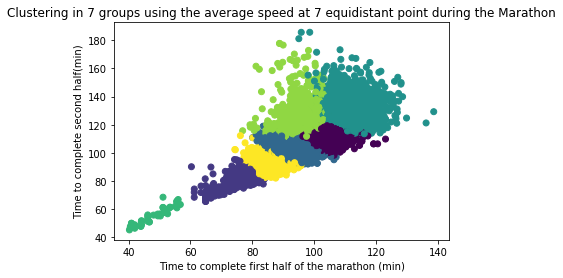

In [73]:
plt.scatter(data_for_cluster.half, data_for_cluster.second_half_time, c=predict)
plt.title("Clustering in 7 groups using the average speed at 7 equidistant point during the Marathon");
plt.xlabel('Time to complete first half of the marathon (min)');
plt.ylabel('Time to complete second half(min)');

Using the different dimension allows us to use get different clustering of the runners of the Boston Marathon.